## Importing Data & High-Level Metadata Overview


In [32]:
# Import CSV dataset
import os
import pandas as pd


yelp_df = pd.read_csv(
    "../data/processed/9_biz_merged_normalized.csv",)

# take a quick look
print(yelp_df.shape)       # rows, columns
print(yelp_df.columns)     # column names
yelp_df.head()             # first 5 rows
yelp_df.info()


(36261, 82)
Index(['business_id', 'city', 'state', 'latitude', 'longitude', 'review_count',
       'is_open', 'review_count_log1p', 'attr_ByAppointmentOnly',
       'attr_BusinessAcceptsCreditCards', 'attr_BikeParking',
       'attr_RestaurantsPriceRange2', 'attr_RestaurantsTakeOut',
       'attr_RestaurantsDelivery', 'attr_Caters', 'attr_WiFi',
       'attr_WheelchairAccessible', 'attr_HappyHour', 'attr_OutdoorSeating',
       'attr_HasTV', 'attr_RestaurantsReservations', 'attr_DogsAllowed',
       'attr_Alcohol', 'attr_GoodForKids', 'attr_RestaurantsAttire',
       'attr_RestaurantsTableService', 'attr_RestaurantsGoodForGroups',
       'attr_DriveThru', 'attr_NoiseLevel', 'attr_Smoking',
       'total_weekly_hours', 'days_open', 'weekend_hours', 'avg_daily_hours',
       'has_hours_info', 'cat__Sandwiches', 'cat__American (Traditional)',
       'cat__Pizza', 'cat__Fast Food', 'cat__Breakfast & Brunch',
       'cat__American (New)', 'cat__Burgers', 'cat__Mexican', 'cat__Italian',
    

## generating a metadata report

In [33]:
def create_metadata(df):
    meta = pd.DataFrame(index=df.columns)
    meta["dtype"] = df.dtypes
    meta["n_unique"] = df.nunique(dropna=False)
    meta["missing_sum"] = df.isna().sum()
    meta["missing_%"] = meta["missing_sum"] / len(df) * 100
    meta["example_value"] = df.apply(lambda s: s.dropna().iloc[0] if s.dropna().shape[0] else None)
    num = df.select_dtypes(include="number")
    meta["min"]  = num.min()
    meta["max"]  = num.max()
    meta["mean"] = num.mean()
    meta["std"]  = num.std()
    return meta

meta_df = create_metadata(yelp_df)
meta_df.to_csv("../data/processed/10_metadata_report.csv", index=True)
meta_df


,dtype,n_unique,missing_sum,missing_%,example_value,min,max,mean,std
business_id,object,36261,0,0.0,MTSW4McQd7CbVtyjqoe9mw,NaN,NaN,NaN,NaN
city,object,839,0,0.0,Philadelphia,NaN,NaN,NaN,NaN
state,object,15,0,0.0,PA,NaN,NaN,NaN,NaN
latitude,float64,34934,0,0.0,39.955505,27.564457,53.649743,36.738050,5.841140
longitude,float64,34500,0,0.0,-75.155564,-120.083748,-74.664459,-87.721345,13.602231
...,...,...,...,...,...,...,...,...,...
avg_stars_2019,float64,6240,0,0.0,4.55,1.000000,5.000000,3.495244,0.968450
first_review_2019,object,36141,0,0.0,2019-03-12 17:04:09,NaN,NaN,NaN,NaN
last_review_2019,object,36191,0,0.0,2021-11-01 18:22:07,NaN,NaN,NaN,NaN
rl_word_mean,float64,19355,0,0.0,81.45,18.333334,540.500000,88.404476,28.092167


## EDA on Data with mixed features

In [34]:
!pip install matplotlib


In [35]:
yelp_df = yelp_df.drop(columns=["rev_count_2019", "city_Other"], errors="ignore")


In [36]:
!pip install seaborn

In [37]:
# # EDA
# exclude = {
#     "business_id", "city", "state",
#     "avg_stars_2019", "review_count",
#     "rev_count_2019", "first_review_2019", "last_review_2019",
# }

# # Keep only numeric columns, then drop excluded ones
# num_cols_all = df.select_dtypes(include=["int64", "category", "float64", "int64", "int8", "boolean"]).columns.tolist()
# X = df[num_cols_all].drop(columns=[c for c in exclude if c in df.columns], errors="ignore")

In [38]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36261 entries, 0 to 36260
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   business_id                      36261 non-null  object 
 1   city                             36261 non-null  object 
 2   state                            36261 non-null  object 
 3   latitude                         36261 non-null  float64
 4   longitude                        36261 non-null  float64
 5   review_count                     36261 non-null  float64
 6   is_open                          36261 non-null  int64  
 7   review_count_log1p               36261 non-null  float64
 8   attr_ByAppointmentOnly           36261 non-null  int64  
 9   attr_BusinessAcceptsCreditCards  36261 non-null  int64  
 10  attr_BikeParking                 36261 non-null  int64  
 11  attr_RestaurantsPriceRange2      36261 non-null  float64
 12  attr_RestaurantsTa

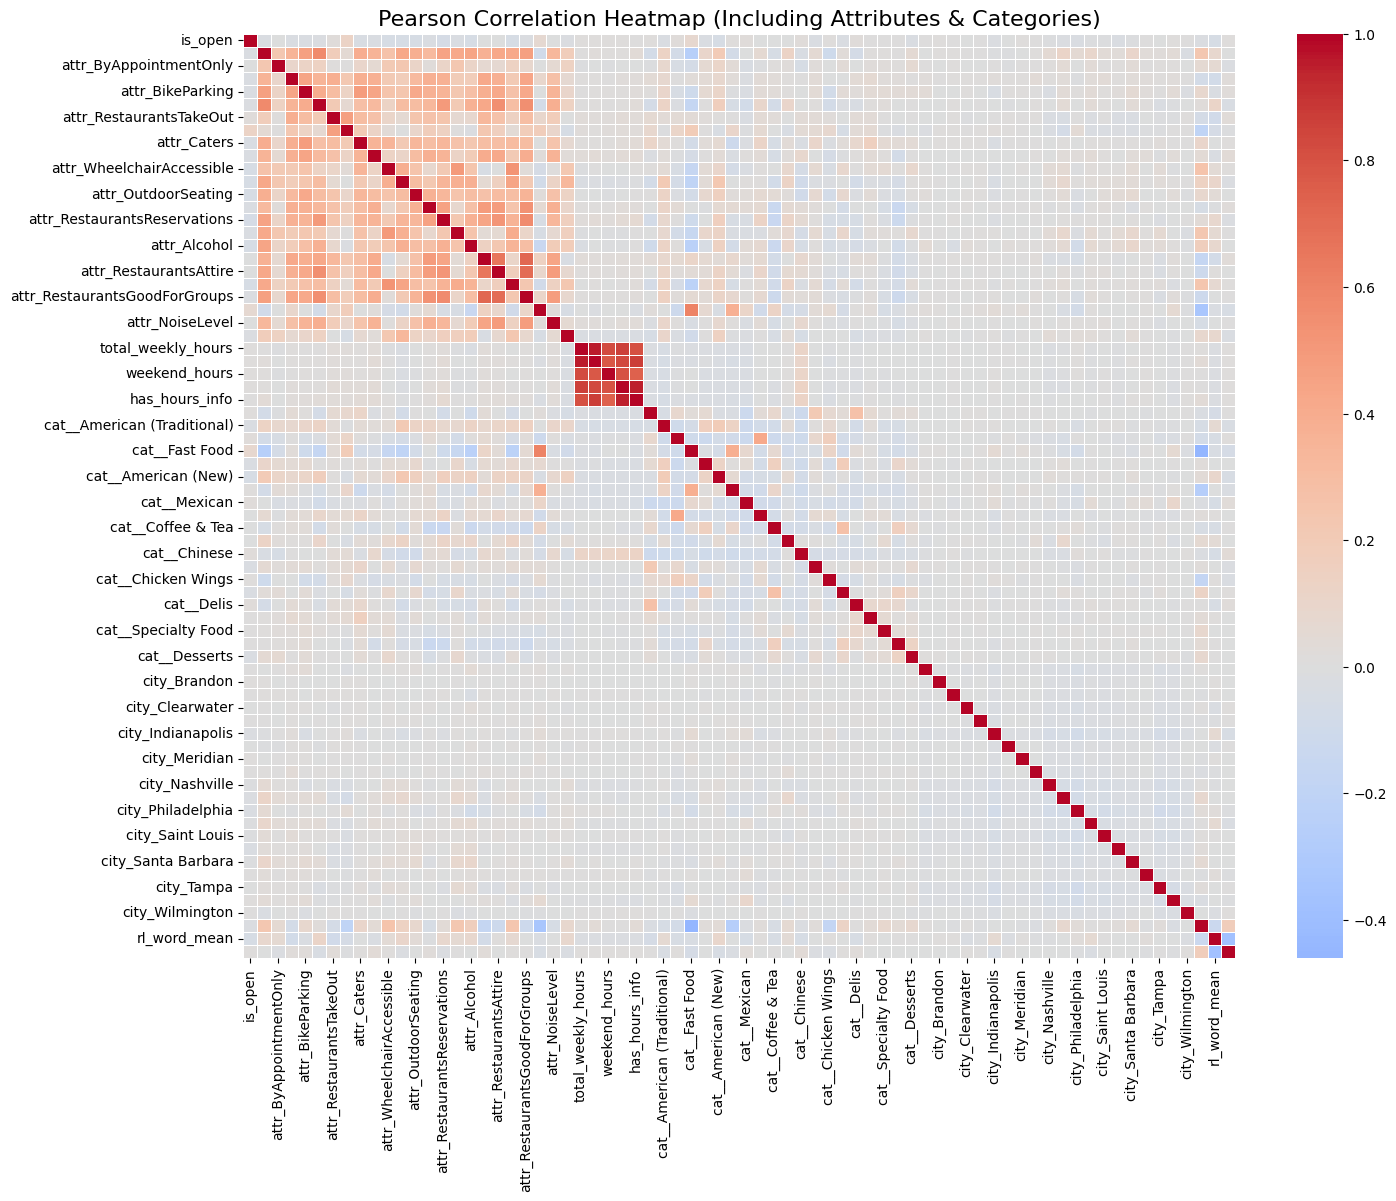

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select ALL numeric (includes Float32)
numeric_df = yelp_df.select_dtypes(include=["float64", "int64", "boolean", "category"]).copy()

# Drop ID/date
numeric_df = numeric_df.drop(columns=["latitude", "longitude", "review_count","city_Other"], errors="ignore")

# Correlation (NaNs are fine; pandas skips them pairwise)
corr = numeric_df.corr(method="pearson")


# 4. Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Pearson Correlation Heatmap (Including Attributes & Categories)", fontsize=16)
plt.show()

## Create Pearson correlation between feature exclude city_

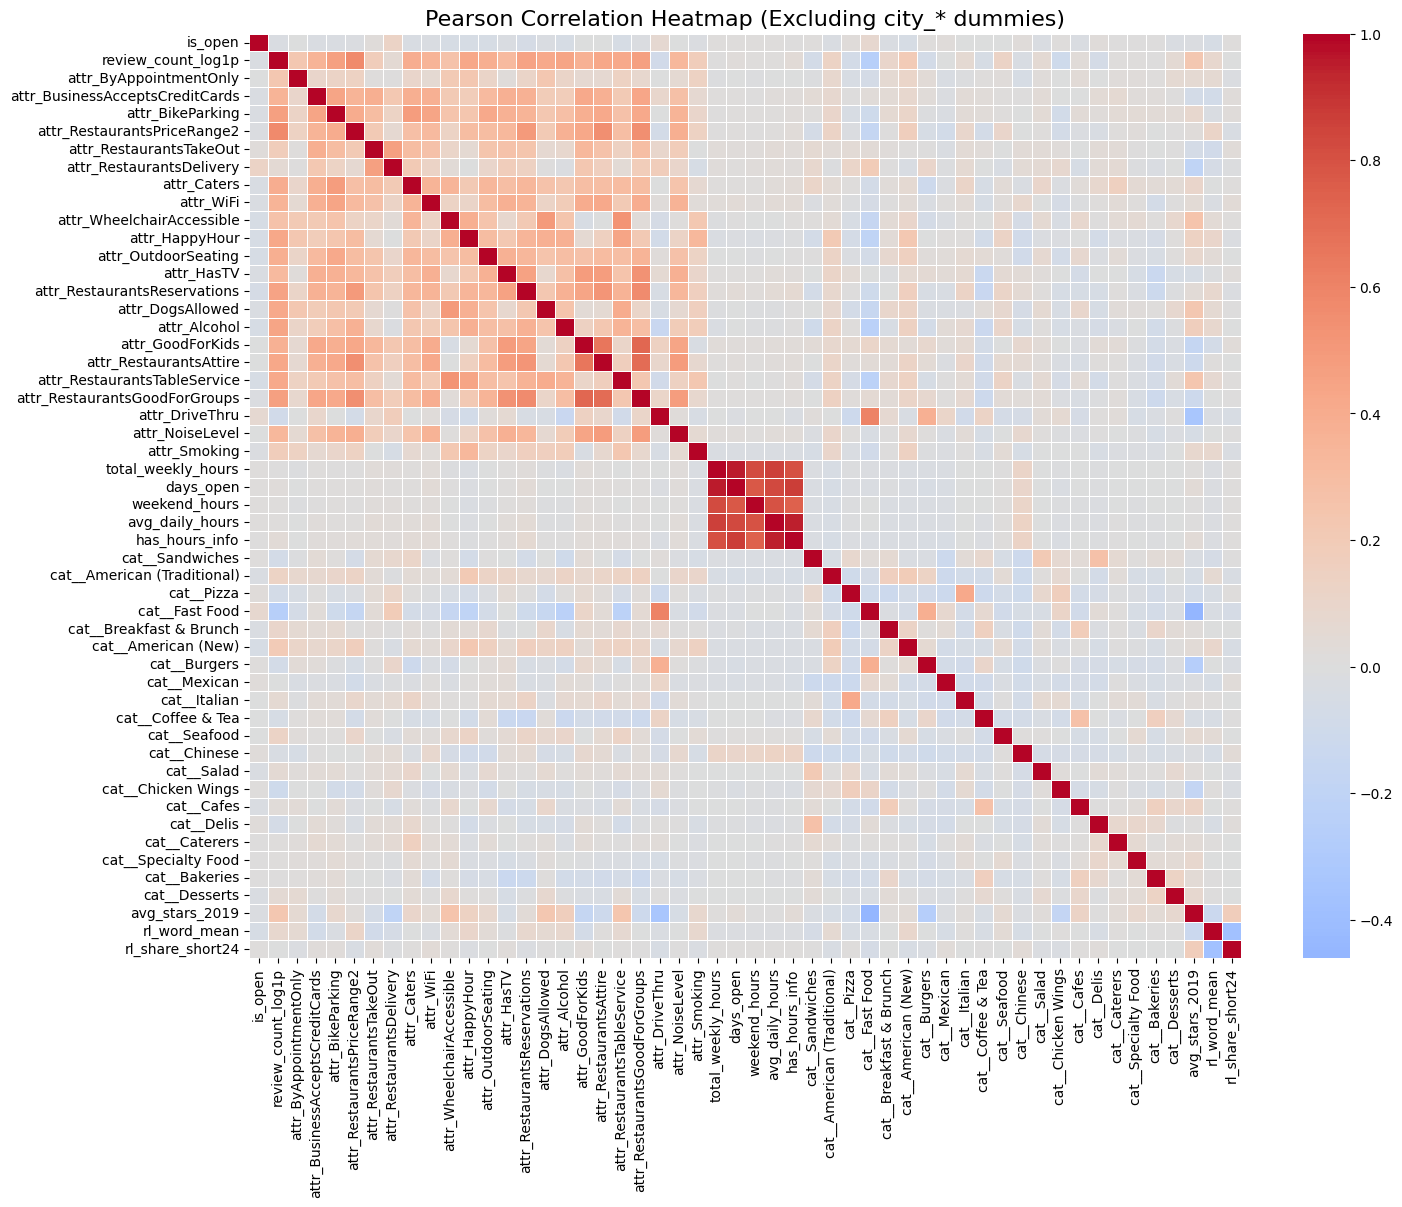

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric + boolean + category
numeric_df = yelp_df.select_dtypes(include=["float64", "int64", "boolean", "category"]).copy()

# Drop IDs, coordinates, counts, and all city_* dummies
drop_cols = ["latitude", "longitude", "review_count", "city_Other"]
drop_cols += [c for c in numeric_df.columns if c.startswith("city_")]

numeric_df = numeric_df.drop(columns=drop_cols, errors="ignore")

# Pearson correlation (NaNs are skipped pairwise)
corr = numeric_df.corr(method="pearson")

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Pearson Correlation Heatmap (Excluding city_* dummies)", fontsize=16)
plt.show()


In [41]:
plt.savefig("pearson_correlation_heatmap.png")


<Figure size 640x480 with 0 Axes>

/var/folders/l_/bfn4zmvj11j3519tmtl4xcd40000gn/T/ipykernel_64710/3920595236.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


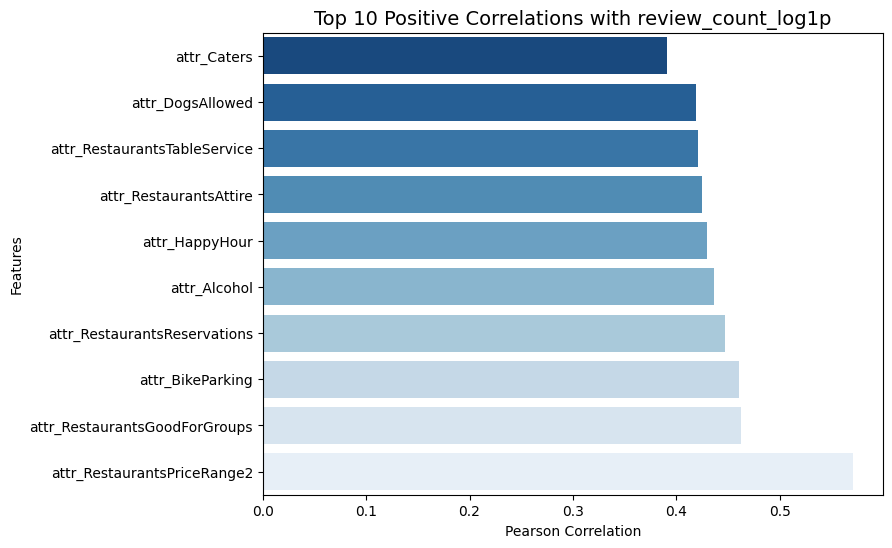

/var/folders/l_/bfn4zmvj11j3519tmtl4xcd40000gn/T/ipykernel_64710/3920595236.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


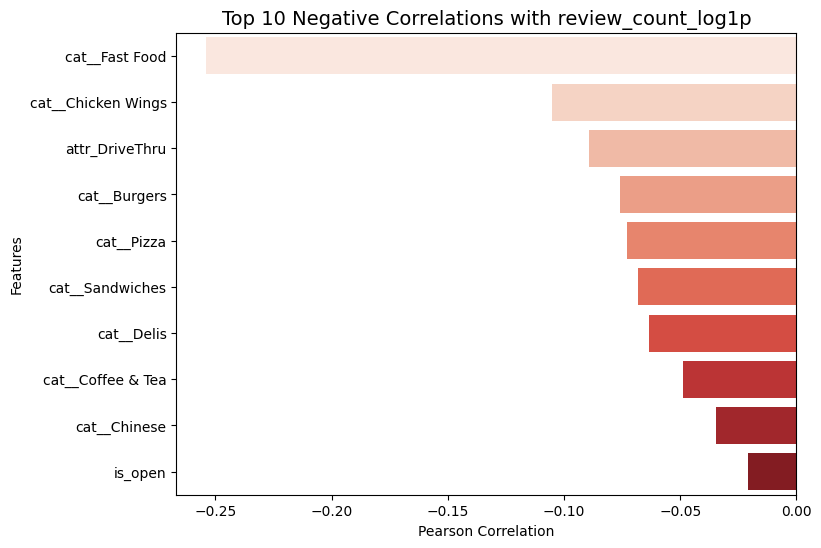

/var/folders/l_/bfn4zmvj11j3519tmtl4xcd40000gn/T/ipykernel_64710/3920595236.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


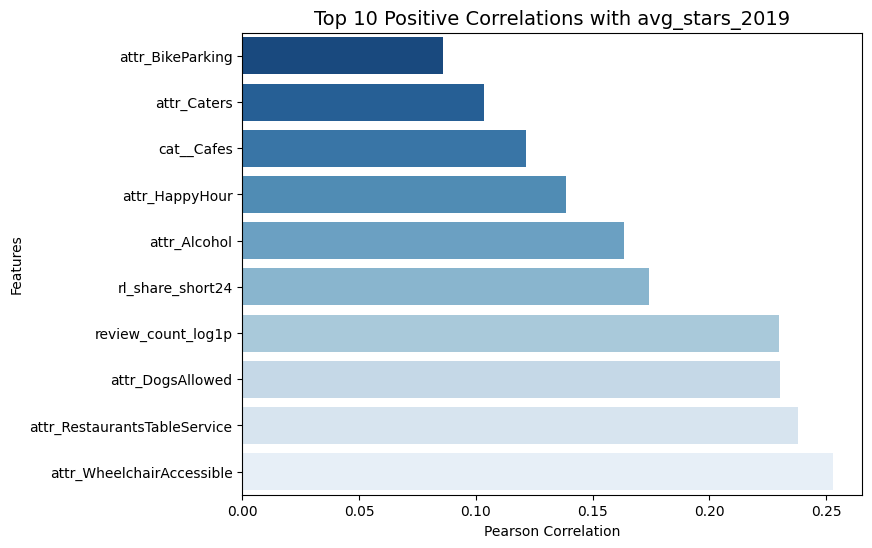

/var/folders/l_/bfn4zmvj11j3519tmtl4xcd40000gn/T/ipykernel_64710/3920595236.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


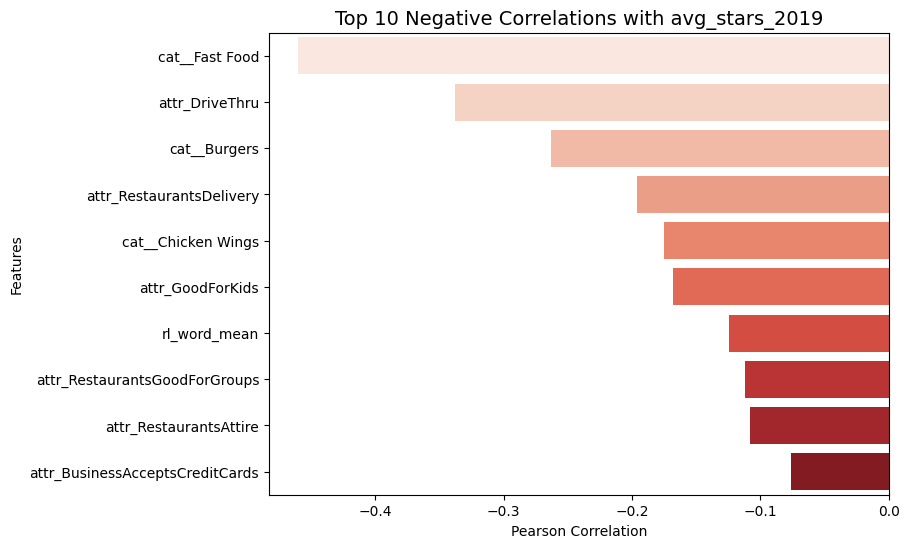

In [42]:


# --- Correlations with target variables ---
corr_target_reviews = corr["review_count_log1p"] \
    .drop(labels=["review_count_log1p", "review_count"], errors="ignore") \
    .sort_values()
corr_target_stars = corr["avg_stars_2019"] \
    .drop(labels=["avg_stars_2019"], errors="ignore") \
    .sort_values()

# --- Plot function ---
def plot_top_corr(corr_series, target_name, top_n=10):
    plt.figure(figsize=(8,6))
    sns.barplot(
        x=corr_series.tail(top_n).values,
        y=corr_series.tail(top_n).index,
        palette="Blues_r"
    )
    plt.title(f"Top {top_n} Positive Correlations with {target_name}", fontsize=14)
    plt.xlabel("Pearson Correlation")
    plt.ylabel("Features")
    plt.show()

    plt.figure(figsize=(8,6))
    sns.barplot(
        x=corr_series.head(top_n).values,
        y=corr_series.head(top_n).index,
        palette="Reds"
    )
    plt.title(f"Top {top_n} Negative Correlations with {target_name}", fontsize=14)
    plt.xlabel("Pearson Correlation")
    plt.ylabel("Features")
    plt.show()

# --- Run plots ---
plot_top_corr(corr_target_reviews, "review_count_log1p", top_n=10)
plot_top_corr(corr_target_stars, "avg_stars_2019", top_n=10)


In [46]:
print(corr["review_count_log1p"].loc[
    ["total_weekly_hours","days_open","weekend_hours","avg_daily_hours"]
])


total_weekly_hours    0.004639
days_open             0.021729
weekend_hours         0.008260
avg_daily_hours       0.016527
Name: review_count_log1p, dtype: float64


## How City relates to other features ( exclude attr and cat)

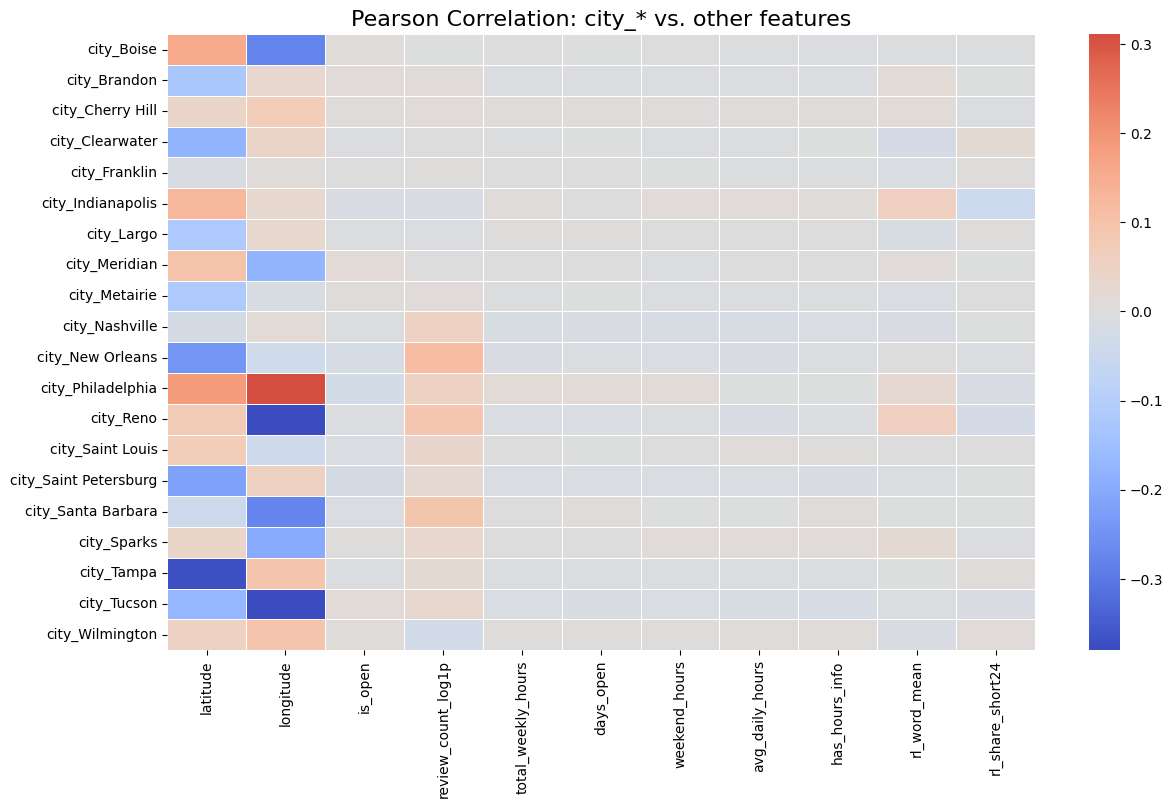

In [43]:
city_cols = [c for c in yelp_df.columns if c.startswith("city_")]
exclude_prefixes = ("attr_", "cat__", "city_")
other_cols = [
    c for c in yelp_df.select_dtypes(include=["float64", "int64", "boolean"]).columns
    if not c.startswith(exclude_prefixes)
]

# If you want to be strict, also drop IDs/dates/target
drop_exact = {"business_id", "city", "state", "avg_stars_2019",
              "review_count", "rev_count_2019",
              "first_review_2019", "last_review_2019"}
other_cols = [c for c in other_cols if c not in drop_exact]
# Subset with only city and other cols
df_corr = yelp_df[city_cols + other_cols].copy()

# Pearson correlation
corr = df_corr.corr(method="pearson")

# Extract only city_* vs other (block of the matrix)
city_vs_other = corr.loc[city_cols, other_cols]
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(city_vs_other, annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Pearson Correlation: city_* vs. other features", fontsize=16)
plt.show()


In [44]:
# List of features you want to summarize by city
features_to_summarize = [
    "avg_stars_2019", 
    "review_count_log1p", 
    "review_count", 
    "latitude", 
    "longitude"
]

# Extract the city name from dummy columns
city_cols = [c for c in yelp_df.columns if c.startswith("city_")]

# Melt city dummies back into a single city label per business
df_city = (
    yelp_df[["business_id"] + city_cols + features_to_summarize]
    .melt(id_vars=["business_id"] + features_to_summarize, var_name="city", value_name="is_in_city")
    .query("is_in_city == 1")
    .drop(columns="is_in_city")
)

# Clean city name (remove prefix "city_")
df_city["city"] = df_city["city"].str.replace("city_", "", regex=False)

# Group by city
city_summary = df_city.groupby("city").agg(
    n_businesses=("business_id", "count"),
    avg_stars=("avg_stars_2019", "mean"),
    avg_reviews=("review_count", "mean"),
    avg_reviews_log=("review_count_log1p", "mean"),
    lat_mean=("latitude", "mean"),
    lon_mean=("longitude", "mean")
).reset_index()

# Sort by average stars
city_summary = city_summary.sort_values("avg_stars", ascending=False)

print(city_summary)


                city  n_businesses  avg_stars  avg_reviews  avg_reviews_log  \
15     Santa Barbara           497   3.894919   279.780684         4.911678   
10       New Orleans          1514   3.832262   281.904227         4.599264   
14  Saint Petersburg           725   3.643292   129.423448         4.172694   
17             Tampa          2104   3.587715   124.606939         4.058843   
11      Philadelphia          3691   3.577521   153.700894         4.146283   
3         Clearwater           489   3.573873   100.402863         3.985679   
0              Boise           629   3.558654    93.868045         3.947445   
13       Saint Louis          1566   3.553454   129.003193         4.152609   
9          Nashville          1807   3.537639   160.950747         4.221895   
12              Reno           896   3.517208   191.460938         4.635101   
19        Wilmington           421   3.465461    61.401425         3.628080   
5       Indianapolis          2086   3.462579   102.

/var/folders/l_/bfn4zmvj11j3519tmtl4xcd40000gn/T/ipykernel_64710/3620291128.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


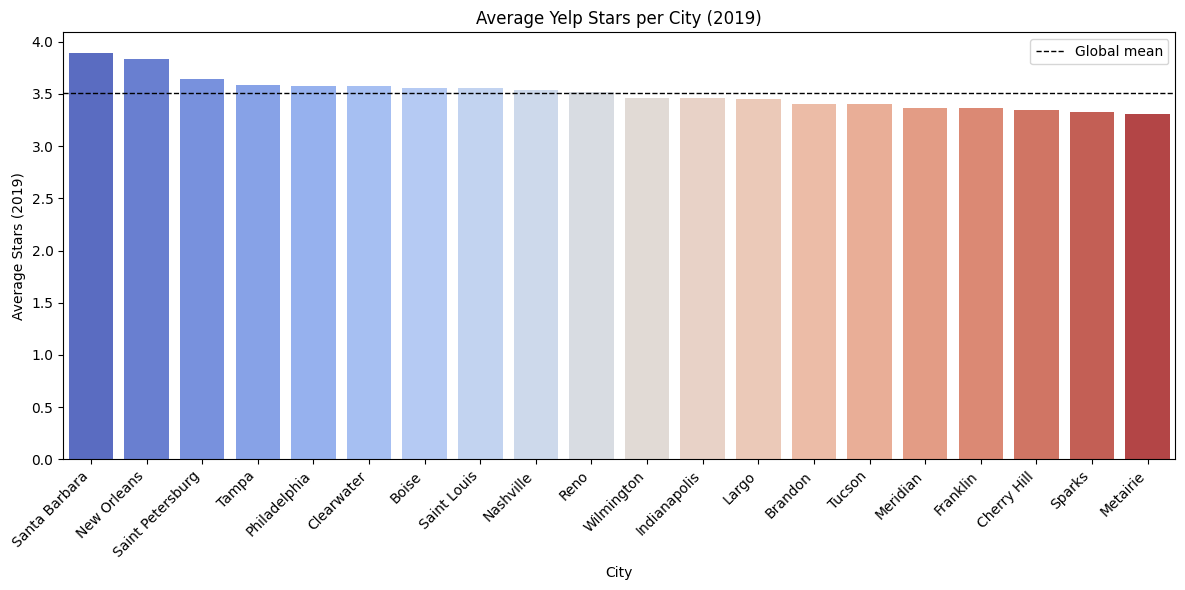

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort cities by avg_stars for plotting
city_summary_sorted = city_summary.sort_values("avg_stars", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=city_summary_sorted,
    x="city", y="avg_stars",
    palette="coolwarm", order=city_summary_sorted["city"]
)

plt.axhline(city_summary["avg_stars"].mean(), color="black", ls="--", lw=1, label="Global mean")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Stars (2019)")
plt.xlabel("City")
plt.title("Average Yelp Stars per City (2019)")
plt.legend()
plt.tight_layout()
plt.show()
